In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
from imblearn.ensemble import BalancedRandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [77]:
pitchers_df = pd.read_csv('Combined CSV\Pitchers_Complete.csv')


In [78]:
pitchers_df.shape

(9427, 35)

In [79]:
pitchers_df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'weight', 'height', 'bats_L',
       'bats_R', 'throws_L', 'throws_R', 'Seasons', 'Wins', 'Losses', 'Games',
       'Pitch_Starts', 'Complete_Games', 'Shutouts', 'Saves', 'Outs_Pitched',
       'Hits', 'Earned_Runs', 'Home_Runs', 'Walks', 'Strikeouts',
       'Batters_Faced', 'Games_Finished', 'Runs_Allowed', 'finalGame',
       'Retired_Years', 'inducted', 'yearID', 'index', 'Total_Games',
       'Games_Started', 'Primary_Position', 'Hall_Eligible'],
      dtype='object')

In [80]:
pitchers_train_model = pitchers_df[pitchers_df['Hall_Eligible']=='eligible']
pitchers_train_model.head()

,playerID,nameFirst,nameLast,weight,height,bats_L,bats_R,throws_L,throws_R,Seasons,...,Runs_Allowed,finalGame,Retired_Years,inducted,yearID,index,Total_Games,Games_Started,Primary_Position,Hall_Eligible
1,aasedo01,Don,Aase,190.0,75.0,0,1,0,1,13,...,503,1990-10-03,31.624658,N,0.0,3,448,91.0,Pitcher,eligible
6,abbotgl01,Glenn,Abbott,200.0,78.0,0,1,0,1,13,...,707,1984-08-08,37.780822,N,0.0,13,248,204.0,Pitcher,eligible
7,abbotji01,Jim,Abbott,200.0,75.0,1,0,1,0,12,...,880,1999-07-21,22.821918,N,0.0,15,263,254.0,Pitcher,eligible
9,abbotpa01,Paul,Abbott,185.0,75.0,0,1,0,1,13,...,421,2004-08-07,17.769863,N,0.0,19,162,112.0,Pitcher,eligible
10,aberal01,Al,Aber,195.0,74.0,1,0,1,0,10,...,205,1957-09-11,64.706849,N,0.0,20,168,30.0,Pitcher,eligible


In [81]:
scale_pos_weight = (pitchers_train_model.inducted.value_counts()[0])/pitchers_train_model.inducted.value_counts()[1]
print(scale_pos_weight)

22.014492753623188


In [82]:
# Getting data ready for machine learning
data = pitchers_train_model.drop(['inducted', 
                                  'playerID', 
                                  'nameFirst', 
                                  'nameLast', 
                                  'finalGame', 
                                  'bats_L',
                                  'bats_R', 
                                  'throws_L', 
                                  'throws_R',
                                  'weight', 
                                  'height',
                                  'yearID',
                                  'Retired_Years',
                                  'Primary_Position',
                                  'Hall_Eligible'], axis=1)
data.fillna(0, inplace=True)
data['Batters_Faced']=pd.to_numeric(data['Batters_Faced'])
target = pitchers_train_model['inducted']
target.fillna('N', inplace=True)
feature_names = data.columns

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [84]:
len(X_test)

397

In [85]:
#CLF = Classifier
clf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.9118387909319899

In [86]:
y_predicted = clf.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced
print(confusion_matrix(y_test, y_predicted))

predictions_df = pd.concat([pd.DataFrame(X_test_scaled),              
                            pd.DataFrame(dict(predicted= y_predicted,actual=y_test
                            )).reset_index(drop=True)], axis=1)

[[346  35]
 [  0  16]]


In [87]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_predicted))

                   pre       rec       spe        f1       geo       iba       sup

          N       1.00      0.91      1.00      0.95      0.95      0.90       381
          Y       0.31      1.00      0.91      0.48      0.95      0.92        16

avg / total       0.97      0.91      1.00      0.93      0.95      0.90       397



In [88]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_predicted) 

0.9540682414698163

In [89]:
# List the features sorted in descending order by feature importance
sorted(zip(clf.feature_importances_, data.columns), reverse=True)

[(0.1296928771196275, 'Wins'),
 (0.12282556248219748, 'Batters_Faced'),
 (0.1204530781686861, 'Outs_Pitched'),
 (0.10353317357786974, 'Shutouts'),
 (0.06232340723497317, 'Strikeouts'),
 (0.061241050896433405, 'Pitch_Starts'),
 (0.058564812199126466, 'Complete_Games'),
 (0.0478335363095796, 'Games'),
 (0.04154715191060843, 'Losses'),
 (0.03912627067426384, 'Games_Finished'),
 (0.03594669985715756, 'Hits'),
 (0.03578248680066356, 'Walks'),
 (0.03222961773958889, 'Runs_Allowed'),
 (0.03026234119775583, 'Saves'),
 (0.02760515754822433, 'Total_Games'),
 (0.01940375207817222, 'Earned_Runs'),
 (0.010713109779580683, 'index'),
 (0.008790839454138282, 'Games_Started'),
 (0.006208741829258964, 'Home_Runs'),
 (0.005916333142093802, 'Seasons')]

<BarContainer object of 20 artists>

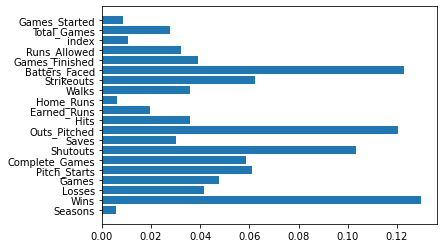

In [90]:
plt.barh(feature_names,clf.feature_importances_)

In [91]:
predictions_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,predicted,actual
0,0.987501,2.779308,1.410357,0.909812,2.336333,1.817139,3.739248,-0.429064,2.500401,1.941870,...,2.712745,2.380524,2.381079,-0.737260,1.455326,0.625373,0.937065,2.489993,Y,Y
1,0.750668,0.255197,0.268212,2.509055,-0.969060,-0.599408,-0.773630,2.562476,-0.117365,-0.130425,...,-0.489028,0.082060,-0.157516,3.763509,-0.276225,-0.819166,2.438233,-0.905380,N,N
2,0.513835,1.609598,0.789190,0.286659,1.145321,1.593167,1.780829,-0.286610,1.314453,1.296995,...,0.782909,0.534866,1.283611,-0.334687,0.957828,1.532936,0.302998,1.253449,Y,N
3,-1.143998,-1.053031,-1.054272,-1.533169,-0.674653,-0.516892,-0.092441,-0.460720,-1.042180,-1.129309,...,-0.883767,-0.833882,-1.061113,-0.688951,-1.066622,-1.221683,-1.528751,-0.604784,N,N
4,-1.143998,0.870834,0.689002,-0.182085,0.569888,1.498862,1.525383,-0.223297,0.896303,0.672822,...,0.641208,0.452225,0.806970,-0.197812,0.410796,-0.398353,0.102481,0.665919,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,-0.670331,-1.083813,-1.414950,-0.579138,-1.136337,-0.670137,-0.773630,-0.302438,-1.149685,-1.150011,...,-1.170543,-1.155839,-1.166817,-0.173657,-1.197996,-1.184573,-0.623715,-1.076174,N,N
393,-1.143998,-0.191139,-0.212692,-0.849355,-0.045691,0.237542,0.077856,-0.460720,-0.174678,-0.167689,...,0.610843,-0.635887,-0.120252,-0.487665,0.005906,-1.024395,-0.883845,0.030568,N,N
394,2.645334,1.624989,2.031523,0.970473,1.941559,1.251314,2.291721,-0.413236,1.890301,1.904606,...,1.876033,1.493850,1.901272,-0.423253,1.791298,1.131454,1.115905,2.066426,Y,N
395,0.513835,0.193634,0.228136,1.516421,-0.259806,-0.257555,-0.007292,1.802720,0.230246,0.187355,...,0.212730,0.471163,0.222433,2.201525,0.096360,-0.613765,1.533197,-0.181216,N,N


ImportError: cannot import name 'XGFClassimport' from 'sklearn' (c:\Users\nealb\anaconda3\envs\mlenv\lib\site-packages\sklearn\__init__.py)